<a href="https://colab.research.google.com/github/deutschkihun/DataScience/blob/master/Kakao_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock price prediction**

## **Source file folder**
- [Google drive](https://drive.google.com/drive/folders/1fiPVMkS4VoQtOzlhIU16__lklyIbMLiU?usp=sharing)

## **Reference**
- [Github](https://github.com/kairess/stock_crypto_price_prediction/blob/master/stock_samsung.ipynb)
- [Yahoo finance](https://finance.yahoo.com/)



## 1.Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

Using TensorFlow backend.


## 2.Reading datasets

In [4]:
kakao = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/kakao.csv')


kakao_copy =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/kakao.csv',
                      index_col='Date', parse_dates=['Date'])

In [5]:
kakao.isna().sum()
kakao.dropna(inplace=True)
kakao_copy.isna().sum()
kakao_copy.dropna(inplace=True)

## 3.Data Visualization

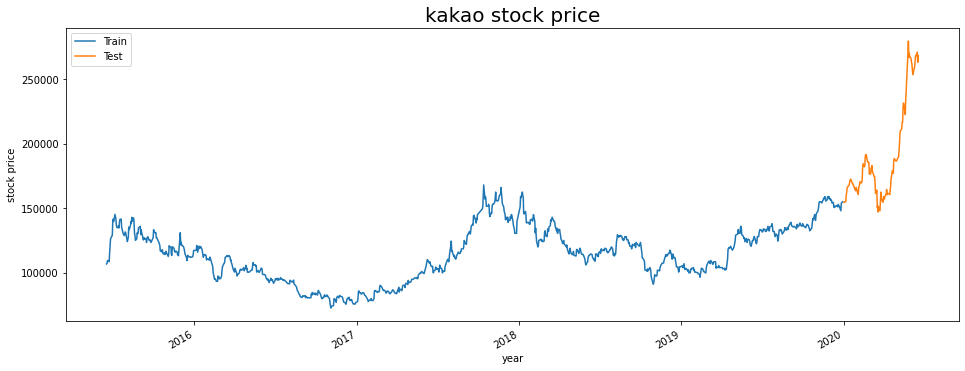

In [6]:
kakao_copy["High"][:'2019'].plot(figsize=(16,6),legend=True)
kakao_copy["High"]['2020':].plot(figsize=(16,6),legend=True)
plt.legend(['Train','Test'])
plt.title('kakao stock price',fontsize=20)
plt.xlabel('year')
plt.ylabel('stock price');

## 4. Data Preprocessing

### 4.1 Define middle price

In [7]:
high_prices = kakao['High'].values
low_prices = kakao['Low'].values
mid_prices = (high_prices + low_prices) / 2


## 4.2  Create window

In [9]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

## 4.3 Normalization

In [10]:
# Normalization by ussig MinMaxscaler 

sc = MinMaxScaler(feature_range=(0,1))
result = sc.fit_transform(result)

## 4.4 Split train,validation and test data

In [11]:

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((938, 50, 1), (234, 50, 1))

## 5. Modelling

In [16]:
def solution_model():

  model = Sequential()
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(64,return_sequences=False))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss',
                               verbose=1)

  model.fit(x_train,y_train,
            validation_data=(x_test,y_test),
            callbacks=[checkpoint],
            batch_size=10,
            verbose=2,
            epochs=20)
  model.load_weights(checkpoint_path)

  return model 

## 6.Training

In [17]:
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Train on 938 samples, validate on 234 samples
Epoch 1/20
 - 4s - loss: 0.0032 - accuracy: 0.0011 - val_loss: 0.0030 - val_accuracy: 0.0043

Epoch 00001: val_loss improved from inf to 0.00300, saving model to stockprice_checkpoint.ckpt
Epoch 2/20
 - 4s - loss: 0.0011 - accuracy: 0.0011 - val_loss: 0.0021 - val_accuracy: 0.0043

Epoch 00002: val_loss improved from 0.00300 to 0.00214, saving model to stockprice_checkpoint.ckpt
Epoch 3/20
 - 4s - loss: 7.7400e-04 - accuracy: 0.0011 - val_loss: 0.0131 - val_accuracy: 0.0043

Epoch 00003: val_loss did not improve from 0.00214
Epoch 4/20
 - 4s - loss: 6.9860e-04 - accuracy: 0.0011 - val_loss: 0.0053 - val_accuracy: 0.0043

Epoch 00004: val_loss did not improve from 0.00214
Epoch 5/20
 - 4s - loss: 5.6820e-04 - accuracy: 0.0011 - val_loss: 0.0085 - val_accuracy: 0.0043

Epoch 00005: val_loss did not improve from 0.00214
Epoch 6/20
 - 4s - loss: 4.9954e-04 - accuracy: 0.0011 - val_loss: 0.0011 - val_accuracy: 0.0043

Epoch 00006: val_loss impro

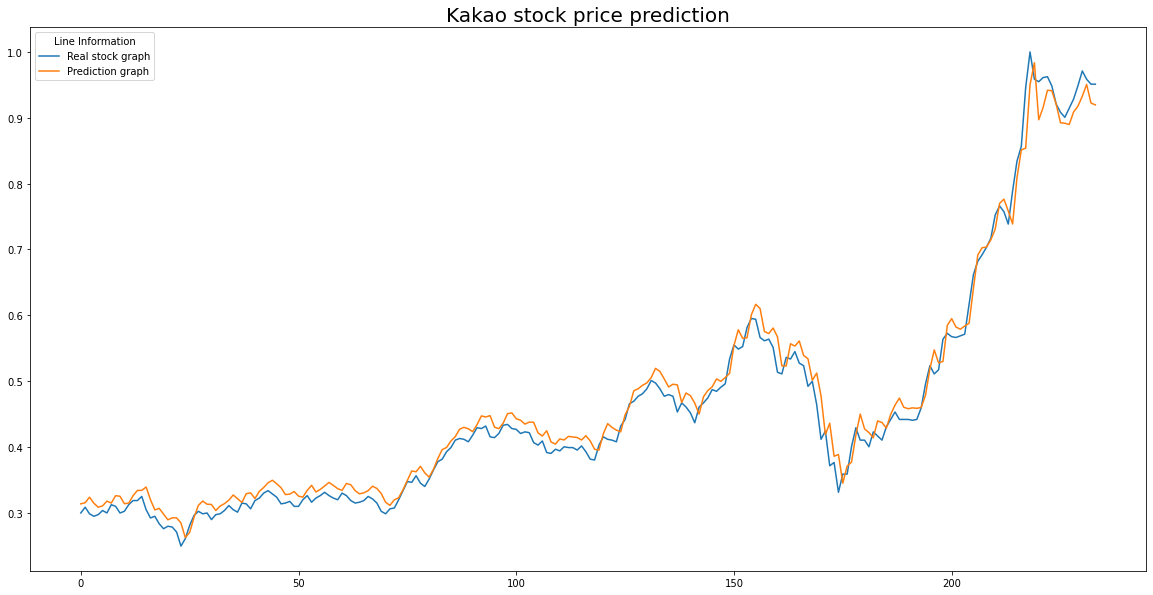

In [18]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Kakao stock price prediction',fontsize=20);